<a href="https://colab.research.google.com/github/lianaling/neural-networks-practice/blob/main/FeedforwardNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feedforward Neural Network

[Building a Feedforward Neural Network using Pytorch NN Module](https://www.marktechpost.com/2019/06/30/building-a-feedforward-neural-network-using-pytorch-nn-module/)
<br />
[PyTorch 101, Part 1: Understanding Graphs, Automatic Differentiation and Autograd](https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/)

In [ ]:
import numpy as np # Matrix multiplcation and vectors' dot product
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook

from IPython.display import HTML
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

import torch
warnings.filterwarnings('ignore')

(1000, 2) (1000,)


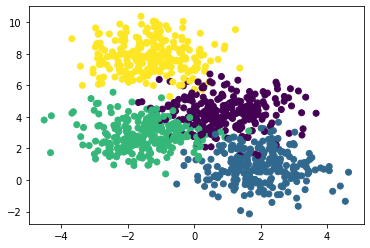

(750, 2) (250, 2) (1000,)


In [ ]:
# Generate non-linearly separable data to show the use of NN

#generate data using make_blobs function from sklearn.
#centers = 4 indicates different types of classes
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

#visualize the data
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

#splitting the data into train and test
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

In [ ]:
#converting the numpy array to torch tensors
X_train, Y_train, X_val, Y_val = map(torch.tensor, (X_train, Y_train, X_val, Y_val))
print(X_train.shape, Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


## Build NN

Code neural network according to the figure below.

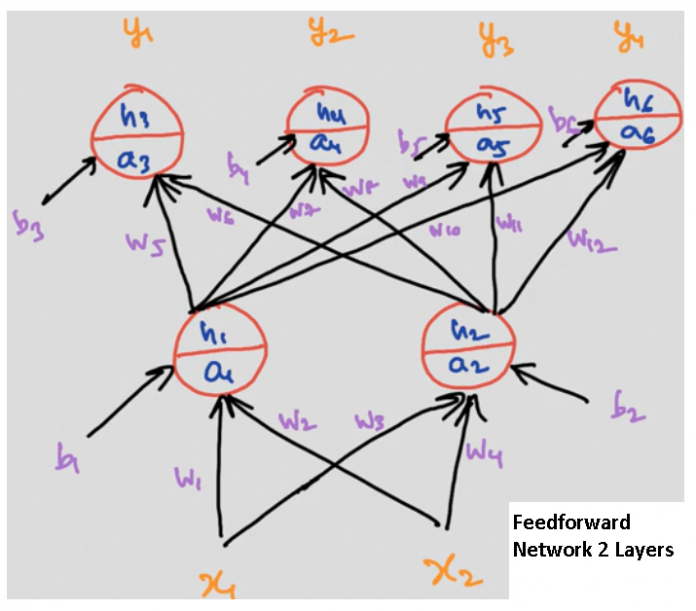

Softmax Function Formula:

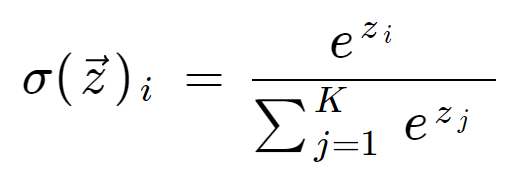

In [ ]:
# Forward pass function. A = pre activation, H = postactivation

def model(x):
  # Layer 1 with two neurons
  A1 = torch.matmul(x, w1) + b1 # (N, 2) x (2, 2) --> (N, 2)
  H1 = A1.sigmoid() # (N, 2)
  print("A1:", A1.shape)
  print("H1:", H1.shape)

  # Layer 2 with four neurons
  A2 = torch.matmul(H1, w2) + b2 # (N, 2) x (2, 4) -> (N, 4)
  H2 = A2.exp() / A2.exp().sum(-1).unsqueeze(-1) # (N, 4) applying softmax at output layer
  print("A2:", A2.shape)
  print("H2:", H2.shape)
  # exp() returns exponential tensor
  # sum(-1) reduce the last dimension
  # insert a dimension at specified position
  # tensor.exp() / tensor.exp().sum(-1).unsqueeze(-1) is the softmax function
  return H2

In [ ]:
w1.shape, w2.shape, b1.shape, b2.shape

(torch.Size([2, 2]), torch.Size([2, 4]), torch.Size([2]), torch.Size([2]))

Cross Entropy Loss
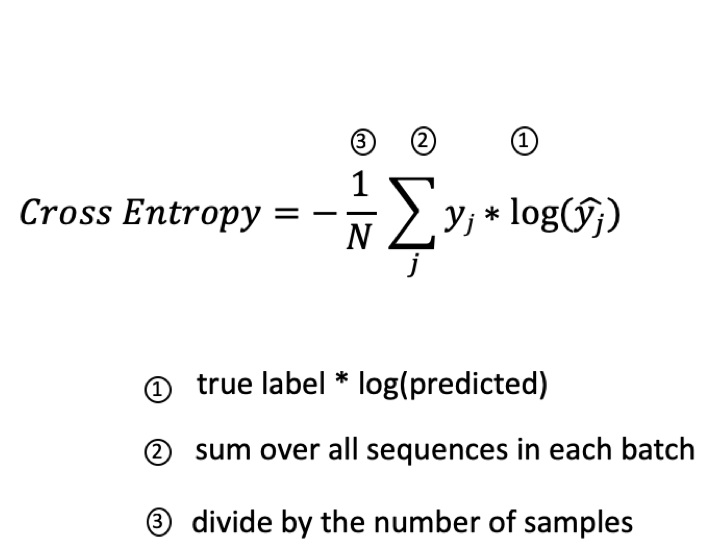

In [ ]:
# Function to calculate loss of a function

# y_hat -> predicted & y -> actual

def loss_fn(y_hat, y):
  return -(y_hat[range(y.shape[0]), y].log()).mean()

Accuracy formula

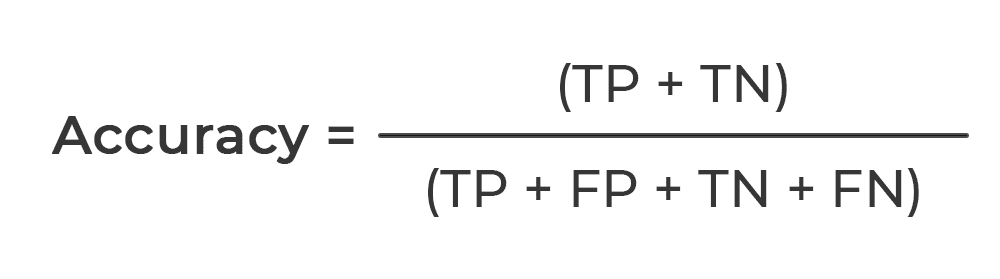

In [ ]:
# Function to calculate model accuracy

def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1) # Generate predictions. Argmax to give either 0 or 1
  return (pred == y).float().mean()

## Train NN

Xavier Initialisation Formula

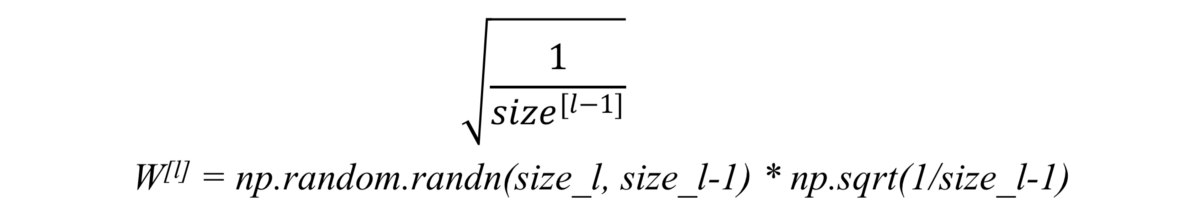

In [ ]:
# Set the seed
torch.manual_seed(0)

# Initialise weights using Xavier Initialisation
w1 = torch.randn(2, 2) / math.sqrt(2)
# torch.randn returns a tensor filled with random numbers
# from a normal distribution with mean 0 and variance 1
w1.requires_grad_()
b1 = torch.zeros(2, requires_grad=True) # Standard: initialise biases with 0

w2 = torch.randn(2, 4) / math.sqrt(2) # square root (n), where n is the input size
w2.requires_grad_() # Different way of setting requires grad
# Use this because torch.randn has no way of setting requires_grad=True as parameter
b2 = torch.zeros(2, requires_grad=True)

In [ ]:
X_train

tensor([[ 2.1643,  4.6207],
        [ 0.1546,  8.1713],
        [-1.0550,  9.1328],
        ...,
        [-2.3174,  2.0106],
        [-2.7311,  6.5260],
        [ 1.1429,  4.9388]], dtype=torch.float64)

In [ ]:
X_train.float()

tensor([[ 2.1643,  4.6207],
        [ 0.1546,  8.1713],
        [-1.0550,  9.1328],
        ...,
        [-2.3174,  2.0106],
        [-2.7311,  6.5260],
        [ 1.1429,  4.9388]])

In [ ]:
# Set training parameters
learning_rate = 0.2
epochs = 10000
X_train = X_train.float()
# Convert to float because the default tensor type in PyTorch is a float tensor
Y_train = Y_train.long()
# Because we are using Y_train as an index for another tensor
# while calculating the loss, convert it into a long tensor
loss_arr = []
acc_arr = []

In [ ]:
# Training the network
for epoch in range(epochs):
  y_hat = model(X_train) # Compute predicted distribution
  loss = loss_fn(y_hat, Y_train) # Compute network loss
  loss.backward() # Backprop gradients
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad(): # No need to create graphs/calculate gradients during this stage
    # Update weights and biases
    w1 -= w1.grad * learning_rate
    b1 -= b1.grad * learning_rate
    w2 -= w2.grad * learning_rate
    b2 -= b2.grad * learning_rate
    
    # Clear gradients so that they don't accumulate to the next backprop
    w1.grad.zero_()
    b1.grad.zero_()
    w2.grad.zero_()
    b2.grad.zero_()

A1: torch.Size([750, 2])
H1: torch.Size([750, 2])


RuntimeError: ignored